In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_pickle('fits/cluster_results_noise.pkl')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Rename method kmeans to "Least squares K-means (sign-flipped eigenvectors)"
df['method'] = df['method'].replace('kmeans', 'Least squares K-means')
df['method'] = df['method'].replace('diametrical', 'Diametrical clustering')
df['method'] = df['method'].replace('diametrical_complex', 'Complex diametrical clustering')
df['method'] = df['method'].replace('grassmann', 'Grassmann clustering')
df['method'] = df['method'].replace('weighted_grassmann', 'Weighted Grassmann clustering')
df['method'] = df['method'].replace('Watson', 'Watson mixture')
df['method'] = df['method'].replace('Complex_Watson', 'Complex Watson mixture')
df['method'] = df['method'].replace('ACG_fullrank', 'ACG mixture')
df['method'] = df['method'].replace('Complex_ACG_fullrank', 'Complex ACG mixture')
df['method'] = df['method'].replace('MACG_fullrank', 'MACG mixture')
df['method'] = df['method'].replace('SingularWishart_fullrank', 'Singular Wishart mixture')

In [9]:
labels[0:]

['Least squares K-means',
 'Diametrical clustering',
 'Complex diametrical clustering',
 'Grassmann clustering',
 'Weighted Grassmann clustering',
 'Watson mixture',
 'Complex Watson mixture',
 'ACG mixture',
 'Complex ACG mixture',
 'MACG mixture',
 'Singular Wishart mixture']

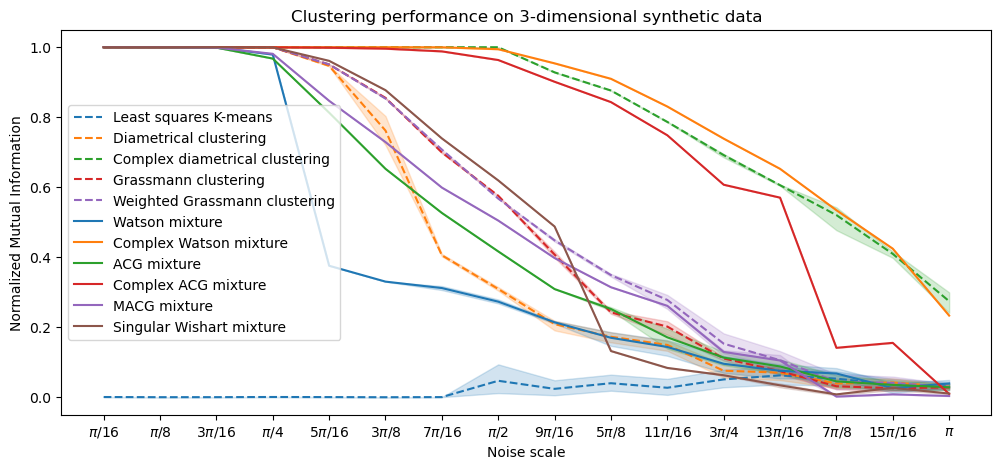

In [14]:
# make a lineplot for each of the unique methods in the column "method". the y-axis value should be the column "nmi". the x-axis should correspond to the column "noise", only the x-axis labels should actually correspond to [pi/4,pi/2,3pi/4,...,2pi]
g1 = ['Least squares K-means','Diametrical clustering','Complex diametrical clustering','Grassmann clustering','Weighted Grassmann clustering']
g2 = ['Watson mixture','Complex Watson mixture','ACG mixture','Complex ACG mixture','MACG mixture','Singular Wishart mixture']

plt.figure(figsize=(12,5))
ax = plt.gca()
ax = sns.lineplot(data=df[df['method'].isin(g1)], x='noise', y='nmi', hue='method',ax=ax)
ax = sns.lineplot(data=df[df['method'].isin(g2)], x='noise', y='nmi', hue='method',ax=ax)
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")
ax.lines[4].set_linestyle("--")
plt.xticks(range(16), labels=[r'$\pi/16$',r'$\pi/8$',r'$3\pi/16$',r'$\pi/4$',r'$5\pi/16$',r'$3\pi/8$',r'$7\pi/16$',r'$\pi/2$',
                              r'$9\pi/16$',r'$5\pi/8$',r'$11\pi/16$',r'$3\pi/4$',r'$13\pi/16$',r'$7\pi/8$',r'$15\pi/16$',r'$\pi$'])#
# plt.xlim(0,3)
plt.ylabel('Normalized Mutual Information')
plt.xlabel('Noise scale')
plt.title('Clustering performance on 3-dimensional synthetic data')
#remove title from legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='lower left')
leg = ax.legend()
leg_lines = leg.get_lines()
leg_lines[0].set_linestyle("--")
leg_lines[1].set_linestyle("--")
leg_lines[2].set_linestyle("--")
leg_lines[3].set_linestyle("--")
leg_lines[4].set_linestyle("--")
plt.savefig('figs/cluster_results_noise.png', bbox_inches='tight', dpi=300)